## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mousestudy_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mousecount = mousestudy_data["Mouse ID"].count()
mousecount


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice_df = mousestudy_data[mousestudy_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicatemice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemice_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,5.0,5.0,5.000000,5.000000,5.000000
mean,21.0,26.0,10.000000,50.110118,0.200000
std,0.0,0.0,7.905694,4.012413,0.447214
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,47.570392,0.000000
50%,21.0,26.0,10.000000,49.880528,0.000000
75%,21.0,26.0,15.000000,53.442020,0.000000
max,21.0,26.0,20.000000,54.657650,1.000000


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
byemouse = mousestudy_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='last')
byemouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mousecount_clean = byemouse["Mouse ID"].count()
mousecount_clean

1888

## Summary Statistics

In [7]:
#Get a list of all drug types before conducting analysis (ADDED BY ME)
drugtypes = byemouse['Drug Regimen'].value_counts()
drugtypes

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
drugcategories = byemouse.groupby('Drug Regimen')
drugcategories.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mean
tumormean = pd.DataFrame(byemouse.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].mean())
tumormean = tumormean.reset_index()
tumormean

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [10]:
#median
tumormedian = pd.DataFrame(byemouse.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].median())
tumormedian = tumormedian.reset_index()
tumormedian

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.597064
2,Capomulin,10,43.421014
3,Capomulin,15,42.798160
4,Capomulin,20,40.716428
...,...,...,...
95,Zoniferol,25,55.676604
96,Zoniferol,30,57.419744
97,Zoniferol,35,60.365832
98,Zoniferol,40,62.274543


In [11]:
#variance
tumorvar = pd.DataFrame(byemouse.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].var())
tumorvar = tumorvar.reset_index()
tumorvar

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,5.030889
2,Capomulin,10,12.344133
3,Capomulin,15,16.878693
4,Capomulin,20,19.035028
...,...,...,...
95,Zoniferol,25,5.808348
96,Zoniferol,30,9.601024
97,Zoniferol,35,10.876760
98,Zoniferol,40,13.958456


In [12]:
#standard deviation
tumorstd = pd.DataFrame(byemouse.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].std())
tumorstd = tumorstd.reset_index()
tumorstd

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915
...,...,...,...
95,Zoniferol,25,2.410052
96,Zoniferol,30,3.098552
97,Zoniferol,35,3.297993
98,Zoniferol,40,3.736102


In [13]:
#sem
tumorsem = pd.DataFrame(byemouse.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].sem())
tumorsem = tumorsem.reset_index()
tumorsem

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumormean = tumormean.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug Regimen')
tumormedian = tumormedian.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug Regimen')
tumorvar = tumorvar.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug Regimen')
tumorstd = tumorstd.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug Regimen')
tumorsem = tumorsem.pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug Regimen')

# Preview that Reformatting worked
display(tumormean)
display(tumormedian)
display(tumorvar)
display(tumorstd)
display(tumorsem)

tumormean.dtypes



Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.184891,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.981377,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.051160,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.223026,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,45.597064,46.370798,46.870483,47.059664,46.621301,46.989764,47.028497,45.521875,47.054185,46.736212
10,43.421014,48.164520,49.471244,49.797416,48.185373,49.109721,48.914724,42.832023,48.925056,48.334346
15,42.798160,49.746427,51.265440,52.246310,50.666054,51.271314,50.930945,41.262007,51.166757,50.583557
20,40.716428,52.112973,53.862724,54.250054,52.855576,53.006865,53.680799,40.772803,53.983436,52.693423
25,40.224165,54.275954,55.924633,56.957917,56.928663,57.106418,55.899823,38.097513,56.522591,55.676604
30,39.260371,56.362744,59.133640,60.296505,59.789636,59.916934,58.952829,38.242066,60.605440,57.419744
35,38.360455,58.208362,60.722723,62.539154,61.893153,62.970450,61.367216,37.624710,63.756990,60.365832
40,36.843898,60.600972,63.344283,66.229606,65.466074,66.287744,62.324348,35.668692,67.396174,62.274543


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.030889,0.568299,5.689821,1.612964,0.942076,1.141526,1.293465,5.831150,1.493585,0.856853
10,12.344133,1.115284,1.674104,2.810499,2.142546,3.879727,3.062097,12.449365,4.472114,1.532725
15,16.878693,2.094922,2.687010,6.397507,4.146905,7.551257,3.934876,14.245578,5.963724,2.883366
20,19.035028,2.326097,4.535510,10.027796,7.086694,13.393928,5.311640,14.216521,8.906693,4.832817
25,17.100444,3.474610,5.451230,10.842320,11.918128,18.206321,4.667490,12.833914,11.072836,5.808348
30,19.210721,3.851331,6.770048,15.706472,14.273894,22.261308,7.235572,17.205421,15.439026,9.601024
35,24.358640,6.708893,11.622731,21.625434,15.415904,23.206488,11.770714,19.654473,17.250985,10.876760
40,31.441568,7.027713,11.134885,20.130057,18.767896,22.543652,22.036801,25.467778,23.871927,13.958456


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,2.385335,1.270025,0.970606,1.068422,1.137306,2.414777,1.222123,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.749885,3.528366,2.114737,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.983652,3.774331,2.442074,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.304700,3.770480,2.984408,2.198367
25,4.135268,1.864031,2.334787,3.292768,3.452264,4.266887,2.160438,3.582445,3.327587,2.410052
30,4.383004,1.962481,2.601931,3.963139,3.778081,4.718189,2.689902,4.147942,3.929253,3.098552
35,4.935447,2.590153,3.409213,4.650315,3.926309,4.817311,3.430847,4.433337,4.153431,3.297993
40,5.607278,2.650983,3.336898,4.486653,4.332193,4.748016,4.694337,5.046561,4.885891,3.736102


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.232152,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.373077,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.495913,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.576175,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug Regimen
Capomulin    float64
Ceftamin     float64
Infubinol    float64
Ketapril     float64
Naftisol     float64
Placebo      float64
Propriva     float64
Ramicane     float64
Stelasyn     float64
Zoniferol    float64
dtype: object

In [15]:
# Using the aggregation method, produce the same summary statistics in a single line
simpletumor = byemouse.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, 'sem']})
simpletumor

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
byemouse.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

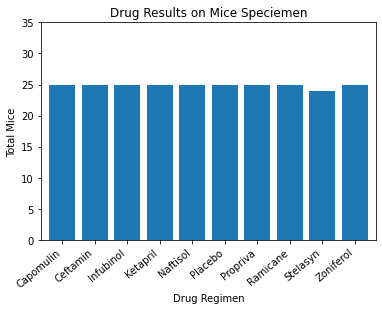

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drugsformice = byemouse.groupby("Drug Regimen")["Mouse ID"].nunique()
drugsformice.plot(kind="bar", title="Drug Results on Mice Speciemen", width=0.8)
plt.ylabel("Total Mice")
plt.ylim(0,35)
plt.xticks(rotation=40, ha="right")
plt.show()

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
